# Importing libraries

In [1689]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

## Importing csv file

In [1]:
data = pd.read_csv("AirQualityUCI.csv")

 As we can observe there is -200 value in most of the columns as min value and the last two columns are empty

In [2]:
data.describe(include = 'all')

Date      Time       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count       9357      9357  9357.000000  9357.000000  9357.000000   
unique       391        24          NaN          NaN          NaN   
top     3/6/2005  10:00:00          NaN          NaN          NaN   
freq          24       390          NaN          NaN          NaN   
mean         NaN       NaN   -34.207524  1048.990061  -159.090093   
std          NaN       NaN    77.657170   329.832710   139.789093   
min          NaN       NaN  -200.000000  -200.000000  -200.000000   
25%          NaN       NaN     0.600000   921.000000  -200.000000   
50%          NaN       NaN     1.500000  1053.000000  -200.000000   
75%          NaN       NaN     2.600000  1221.000000  -200.000000   
max          NaN       NaN    11.900000  2040.000000  1189.000000   

           C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count   9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   
unique          NaN            NaN          NaN           NaN          NaN   
top             NaN            NaN          NaN           NaN          NaN   
freq            NaN            NaN          NaN           NaN          NaN   
mean       1.865683     894.595276   168.616971    794.990168    58.148873   
std       41.380206     342.333252   257.433866    321.993552   126.940455   
min     -200.000000    -200.000000  -200.000000   -200.000000  -200.000000   
25%        4.000000     711.000000    50.000000    637.000000    53.000000   
50%        7.900000     895.000000   141.000000    794.000000    96.000000   
75%       13.600000    1105.000000   284.000000    960.000000   133.000000   
max       63.700000    2214.000000  1479.000000   2683.000000   340.000000   

        PT08.S4(NO2)  PT08.S5(O3)            T           RH           AH  \
count    9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
unique           NaN          NaN          NaN          NaN          NaN   
top              NaN          NaN          NaN          NaN          NaN   
freq             NaN          NaN          NaN          NaN          NaN   
mean     1391.479641   975.072032     9.778305    39.485380    -6.837604   
std       467.210125   456.938184    43.203623    51.216145    38.976670   
min      -200.000000  -200.000000  -200.000000  -200.000000  -200.000000   
25%      1185.000000   700.000000    10.900000    34.100000     0.692300   
50%      1446.000000   942.000000    17.200000    48.600000     0.976800   
75%      1662.000000  1255.000000    24.100000    61.900000     1.296200   
max      2775.000000  2523.000000    44.600000    88.700000     2.231000   

        Unnamed: 15  Unnamed: 16  
count           0.0          0.0  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean            NaN          NaN  
std             NaN          NaN  
min             NaN          NaN  
25%             NaN          NaN  
50%             NaN          NaN  
75%             NaN          NaN  
max             NaN          NaN

We have 17 columns with rows 9471

In [3]:
data.shape

(9471, 17)

In [4]:
data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6       1360.0     150.0      11.9   
1  3/10/2004  19:00:00     2.0       1292.0     112.0       9.4   
2  3/10/2004  20:00:00     2.2       1402.0      88.0       9.0   
3  3/10/2004  21:00:00     2.2       1376.0      80.0       9.2   
4  3/10/2004  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


We have 9357 valid values and the rest 114 values are null values

# Data Cleaning

 Dropping the columns

In [6]:
data.drop(['Unnamed: 15','Unnamed: 16'],axis = 1,inplace  = True)

In [7]:
data.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

keeping only the non-null values

In [8]:
data = data.iloc[:9357]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


Now we don't have any null values

In [10]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
data['Time'] = pd.to_datetime(data['Time'])

Converting 'Date' and 'time' to Timestamp

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null datetime64[ns]
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](2), float64(13)
memory usage: 1.1 MB


Now We are replacing -200 value in all the columns with null value

In [14]:
data=data.replace(-200,np.NaN)

In [15]:
data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Dropping the null values in output variable as we can't fill with mean , median and mode


In [16]:
data.dropna(axis=0,subset=['RH'],inplace = True)

In [17]:
data.isnull().sum()

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

Too many null values in NMHC(GT) so we just removed this columns and filling with mean value for rest of the columns

In [18]:
data=data.drop(['NMHC(GT)'],axis = 1)

In [19]:
data['CO(GT)'] =data['CO(GT)'].fillna(data['CO(GT)'].mean())
data['NOx(GT)'] =data['NOx(GT)'].fillna(data['NOx(GT)'].mean())
data['NO2(GT)'] =data['NO2(GT)'].fillna(data['NO2(GT)'].mean())

Now we don't have any null values 

In [20]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [21]:
data.reset_index(drop=True,inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 14 columns):
Date             8991 non-null datetime64[ns]
Time             8991 non-null datetime64[ns]
CO(GT)           8991 non-null float64
PT08.S1(CO)      8991 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          8991 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          8991 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: datetime64[ns](2), float64(12)
memory usage: 983.5 KB


In [23]:
data['Hour'] = data['Time'].dt.hour
data['Month'] = data['Date'].dt.month

data.drop(['Date','Time'],axis = 1,inplace = True)

## Visualization

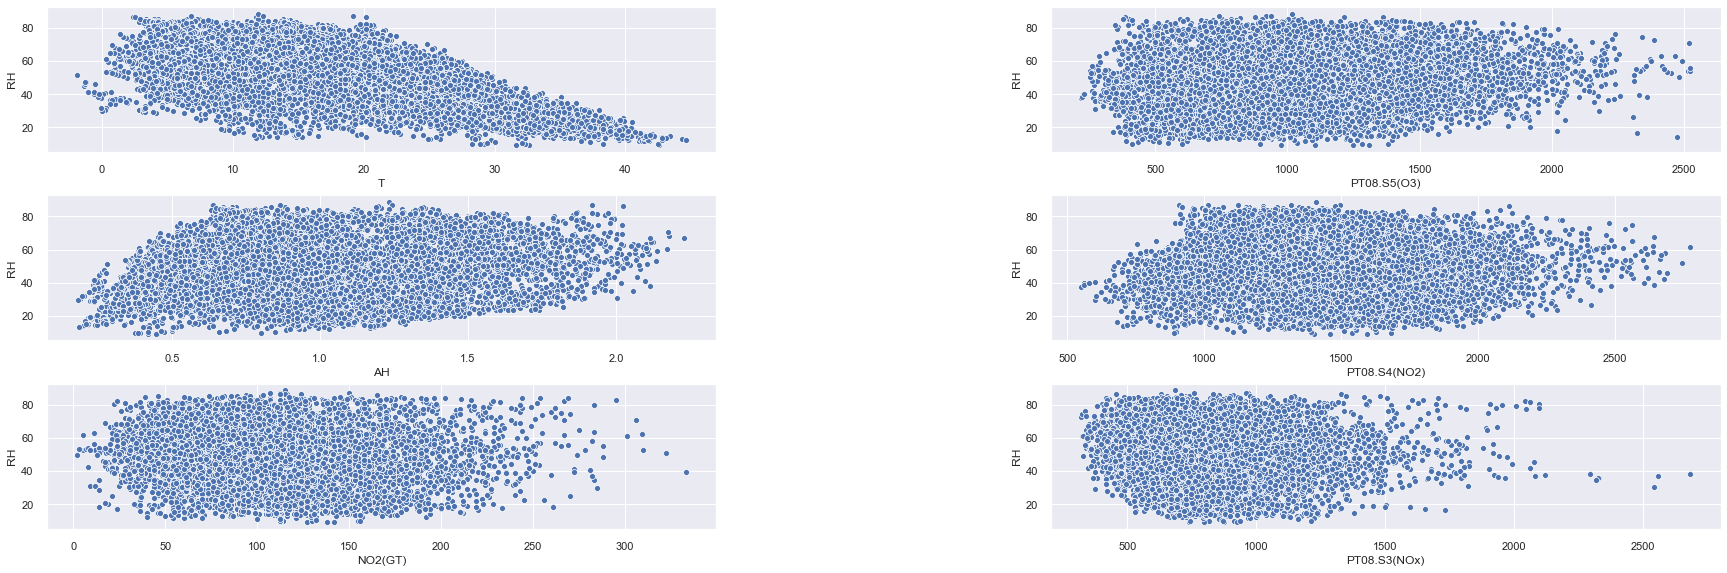

In [1646]:
plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace= 0.3, wspace= 0.5)
plt.subplot(6,2,1)
#plt.title ('Temp')
sns.scatterplot(x=data['T'],y=data['RH'],data=data)
plt.subplot(6,2,2)
#plt.title ('PT08.S5(O3)')
sns.scatterplot(x=data['PT08.S5(O3)'],y=data['RH'],data=data)
plt.subplot(6,2,3)
#plt.title ('AH')
sns.scatterplot(x='AH',y='RH',data=data)
plt.subplot(6,2,4)
#plt.title ('PT08.S4(NO2)')
sns.scatterplot(x='PT08.S4(NO2)',y='RH',data=data)
plt.subplot(6,2,5)
#plt.title ('NO2(GT)')
sns.scatterplot(x='NO2(GT)',y='RH',data=data)
plt.subplot(6,2,6)
#plt.title ('PT08.S3(NOx)')
sns.scatterplot(x='PT08.S3(NOx)',y='RH',data=data)
plt.show()

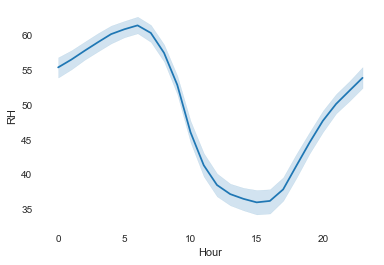

In [24]:
sns.lineplot(x='Hour', y='RH', data=data)

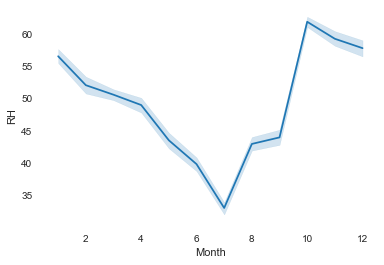

In [25]:
sns.lineplot(x='Month', y='RH', data=data)

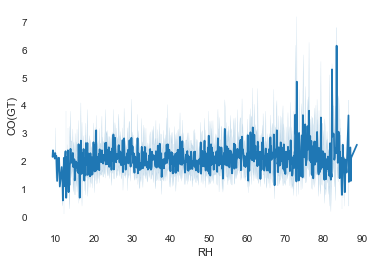

In [26]:
sns.lineplot(x='RH',y='CO(GT)',data=data)

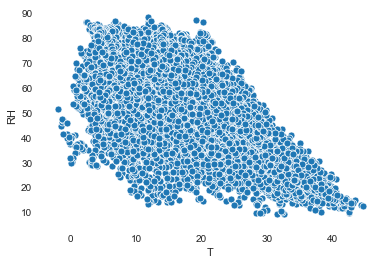

In [27]:

sns.scatterplot(x='T',y='RH',data=data)


With increase in temperature the relative humidity decreases. so there is some relationship with Temperature

Perform Pandas profiling to understand quick overview of columns

In [28]:
#import pandas_profiling
#report = pandas_profiling.ProfileReport(data)
#report.to_file("airqualityfinal.html")


Most of the columns follows normal distributions

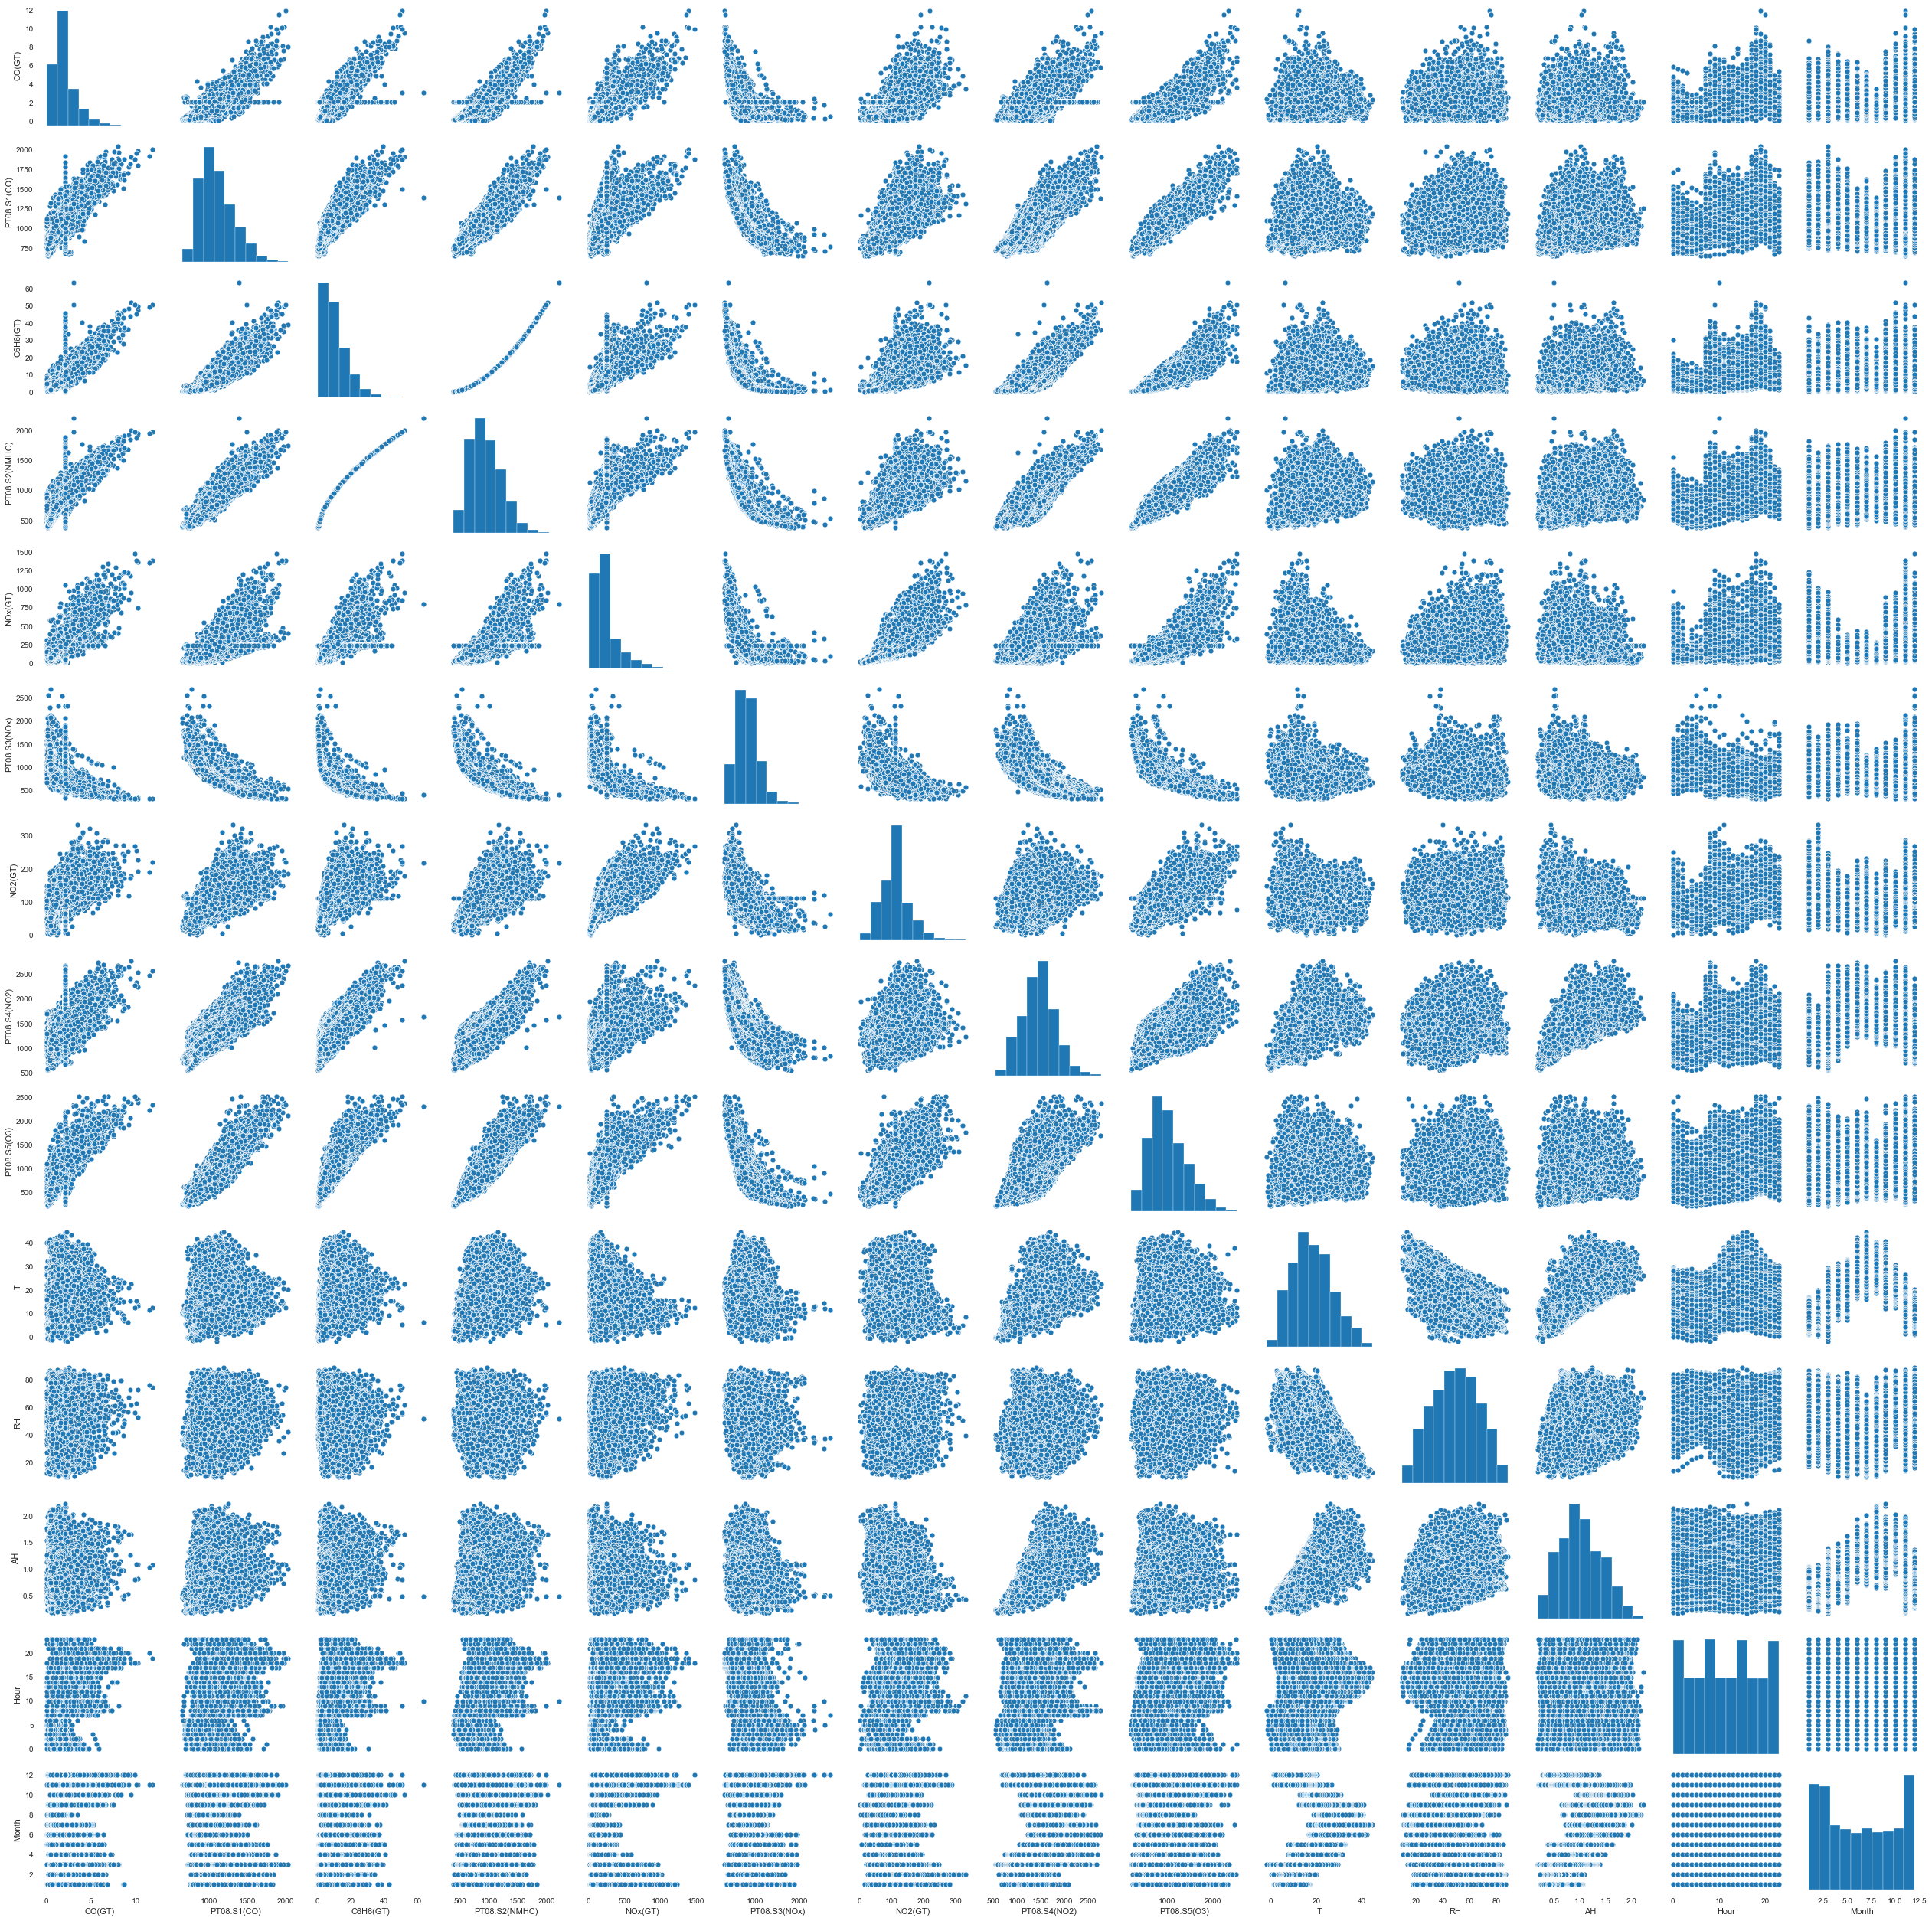

In [29]:
sns.pairplot(data)

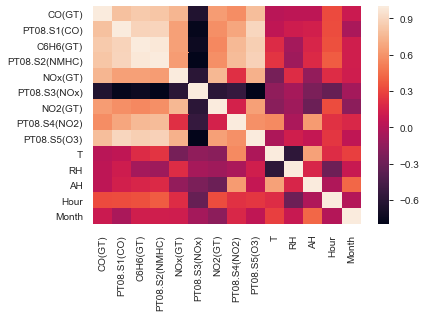

In [30]:
correc= data.corr
sns.heatmap(correc())

In [31]:
correc = data.corr
correc()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.800535  0.840490       0.823196  0.752791   
PT08.S1(CO)    0.800535     1.000000  0.883795       0.892964  0.650713   
C6H6(GT)       0.840490     0.883795  1.000000       0.981950  0.651234   
PT08.S2(NMHC)  0.823196     0.892964  0.981950       1.000000  0.635497   
NOx(GT)        0.752791     0.650713  0.651234       0.635497  1.000000   
PT08.S3(NOx)  -0.635334    -0.771938 -0.735744      -0.796703 -0.594881   
NO2(GT)        0.636010     0.584936  0.556664       0.582967  0.758046   
PT08.S4(NO2)   0.576821     0.682881  0.765731       0.777254  0.216447   
PT08.S5(O3)    0.785709     0.899324  0.865689       0.880578  0.726933   
T              0.020051     0.048627  0.198956       0.241373 -0.249307   
RH             0.044529     0.114606 -0.061681      -0.090380  0.202537   
AH             0.043457     0.135324  0.167972       0.186933 -0.135362   
Hour           0.324816     0.328035  0.344169       0.389196  0.202333   
Month          0.097419    -0.040345  0.128537       0.128246  0.122629   

               PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T  \
CO(GT)            -0.635334  0.636010      0.576821     0.785709  0.020051   
PT08.S1(CO)       -0.771938  0.584936      0.682881     0.899324  0.048627   
C6H6(GT)          -0.735744  0.556664      0.765731     0.865689  0.198956   
PT08.S2(NMHC)     -0.796703  0.582967      0.777254     0.880578  0.241373   
NOx(GT)           -0.594881  0.758046      0.216447     0.726933 -0.249307   
PT08.S3(NOx)       1.000000 -0.591566     -0.538468    -0.796569 -0.145112   
NO2(GT)           -0.591566  1.000000      0.145700     0.654040 -0.172381   
PT08.S4(NO2)      -0.538468  0.145700      1.000000     0.591144  0.561270   
PT08.S5(O3)       -0.796569  0.654040      0.591144     1.000000 -0.027172   
T                 -0.145112 -0.172381      0.561270    -0.027172  1.000000   
RH                -0.056740 -0.084063     -0.032188     0.124956 -0.578621   
AH                -0.232017 -0.303675      0.629641     0.070751  0.656397   
Hour              -0.323674  0.331895      0.221251     0.245063  0.206642   
Month             -0.061561 -0.160853      0.176311     0.049029  0.282929   

                     RH        AH      Hour     Month  
CO(GT)         0.044529  0.043457  0.324816  0.097419  
PT08.S1(CO)    0.114606  0.135324  0.328035 -0.040345  
C6H6(GT)      -0.061681  0.167972  0.344169  0.128537  
PT08.S2(NMHC) -0.090380  0.186933  0.389196  0.128246  
NOx(GT)        0.202537 -0.135362  0.202333  0.122629  
PT08.S3(NOx)  -0.056740 -0.232017 -0.323674 -0.061561  
NO2(GT)       -0.084063 -0.303675  0.331895 -0.160853  
PT08.S4(NO2)  -0.032188  0.629641  0.221251  0.176311  
PT08.S5(O3)    0.124956  0.070751  0.245063  0.049029  
T             -0.578621  0.656397  0.206642  0.282929  
RH             1.000000  0.167971 -0.295799  0.082543  
AH             0.167971  1.000000 -0.018627  0.425833  
Hour          -0.295799 -0.018627  1.000000  0.000277  
Month          0.082543  0.425833  0.000277  1.000000

In [32]:
cat = ['Hour','Month']

In [35]:
col

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH', 'Hour', 'Month'],
      dtype='object')

In [34]:
col = data.columns

In [36]:
thres = 0.8

for c in col:
    for r in col:
        if(r<c):
            if (c is not 'RH') and (c not in cat) and (r is not 'RH') and (r not in cat):
                if abs(correc()[c][r])>thres:
                    print(c,r,str(correc()[c][r]))
                

CO(GT) C6H6(GT) 0.8404901529596167
PT08.S1(CO) CO(GT) 0.8005345034035
PT08.S1(CO) C6H6(GT) 0.8837950766080604
PT08.S2(NMHC) CO(GT) 0.82319560765703
PT08.S2(NMHC) PT08.S1(CO) 0.8929643887070445
PT08.S2(NMHC) C6H6(GT) 0.981950315801252
PT08.S5(O3) PT08.S1(CO) 0.8993235214436079
PT08.S5(O3) C6H6(GT) 0.8656885045054649
PT08.S5(O3) PT08.S2(NMHC) 0.8805777489667826


In [37]:
high_correc =['PT08.S2(NMHC)','PT08.S1(CO)','PT08.S5(O3)']

In [38]:
data.drop(high_correc,axis = 1,inplace = True)

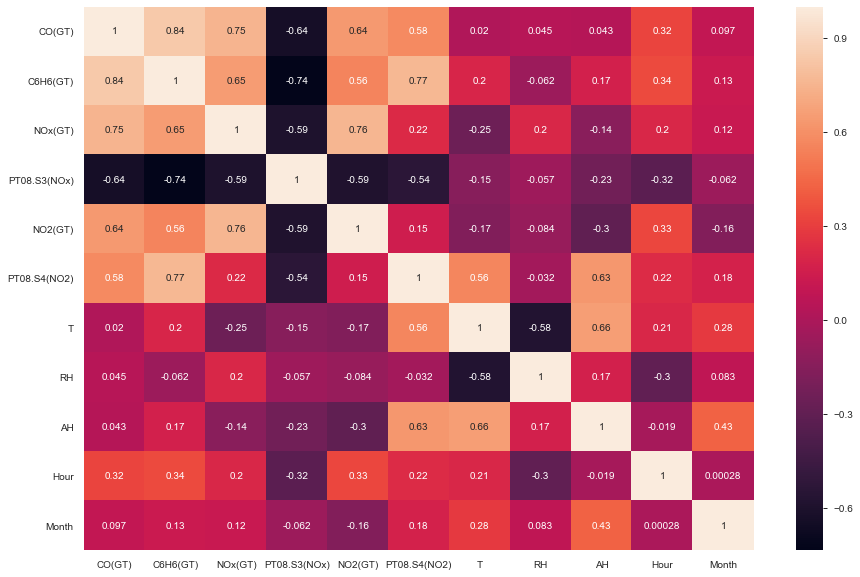

In [42]:
correc= data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correc, annot=True)

In [43]:
correc = data.corr
col = data.columns

In [44]:
date = ['Month','Hour']

In [45]:
thres = 0.8

for c in col:
    for r in col:
        if(r<c):
            if (c is not 'RH') and (c not in date) and (r is not 'RH') and (r not in date):
                if abs(correc()[c][r])>thres:
                    print(c,r,str(correc()[c][r]))

CO(GT) C6H6(GT) 0.8404901529596167


In [46]:
data.head()

CO(GT)  C6H6(GT)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)     T    RH  \
0     2.6      11.9    166.0        1056.0    113.0        1692.0  13.6  48.9   
1     2.0       9.4    103.0        1174.0     92.0        1559.0  13.3  47.7   
2     2.2       9.0    131.0        1140.0    114.0        1555.0  11.9  54.0   
3     2.2       9.2    172.0        1092.0    122.0        1584.0  11.0  60.0   
4     1.6       6.5    131.0        1205.0    116.0        1490.0  11.2  59.6   

       AH  Hour  Month  
0  0.7578    18      3  
1  0.7255    19      3  
2  0.7502    20      3  
3  0.7867    21      3  
4  0.7888    22      3

In [47]:
data.iloc[8990]

CO(GT)             2.2000
C6H6(GT)          11.9000
NOx(GT)          265.0000
PT08.S3(NOx)     654.0000
NO2(GT)          168.0000
PT08.S4(NO2)    1129.0000
T                 28.5000
RH                13.1000
AH                 0.5028
Hour              14.0000
Month              4.0000
Name: 8990, dtype: float64

In [48]:
dummy = pd.get_dummies(data['Month'],drop_first=True,prefix='month')

In [49]:
dummy1 = pd.get_dummies(data['Hour'],drop_first=True,prefix='hour')

In [50]:
data.drop(['Month','Hour'],axis = 1,inplace = True)

In [51]:
data1 = data.drop(['RH'],axis =1)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()

In [53]:
scaled.fit(data1)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [54]:
input_scaled=scaled.transform(data1)

In [55]:
input_scaled = pd.DataFrame(input_scaled,columns=data1.columns)

In [56]:
print(input_scaled.shape)
print(dummy.shape)
print(dummy1.shape)

(8991, 8)
(8991, 11)
(8991, 23)


In [57]:
data = data['RH']

In [58]:
newdata = pd.concat([input_scaled,dummy,dummy1,data],axis = 1)

In [59]:
newdata.dropna(inplace = True)

In [60]:
newdata.tail()

CO(GT)  C6H6(GT)   NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  \
8986  0.254237  0.210692  0.318213      0.091910  0.567976      0.370054   
8987  0.194915  0.177673  0.237644      0.119441  0.534743      0.320594   
8988  0.194915  0.193396  0.197021      0.119017  0.522659      0.310252   
8989  0.169492  0.147799  0.157752      0.160949  0.465257      0.220324   
8990  0.177966  0.185535  0.178064      0.140618  0.501511      0.259892   

             T        AH  month_2  month_3  ...  hour_15  hour_16  hour_17  \
8986  0.511828  0.279578        0        0  ...        0        0        0   
8987  0.563441  0.257636        0        0  ...        0        0        0   
8988  0.619355  0.222792        0        0  ...        0        0        0   
8989  0.649462  0.160876        0        0  ...        0        0        0   
8990  0.653763  0.155451        0        0  ...        0        0        0   

      hour_18  hour_19  hour_20  hour_21  hour_22  hour_23    RH  
8986        0        0        0        0        0        0  29.3  
8987        0        0        0        0        0        0  23.7  
8988        0        0        0        0        0        0  18.3  
8989        0        0        0        0        0        0  13.5  
8990        0        0        0        0        0        0  13.1  

[5 rows x 43 columns]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x=newdata.drop(['RH'],axis = 1)

In [63]:
#x=newdata.drop(['RH','AH'],axis = 1)

In [64]:
x.columns

Index(['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'T', 'AH', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [65]:
y = newdata['RH']

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

In [69]:
# Defining random seed
seed=32

# Creating Models

#lda = LinearDiscriminantAnalysis()
svc = SVR()
dtree = DecisionTreeRegressor(random_state=seed)
rf = RandomForestRegressor(10, random_state=seed)
gdb = GradientBoostingRegressor(random_state=seed)
adb = AdaBoostRegressor(random_state=seed)
xgb = XGBRegressor(random_state=seed)
knn = KNeighborsRegressor()
lgbm = LGBMRegressor(random_state=seed)
lr = LinearRegression()

first_models = [svc, dtree, 
                 rf, gdb, adb, xgb, knn, lgbm,lr]
first_model_names = ['SVM','Decision Tree', 
                     'Random Forest', 'GradientBoosting',
                    'AdaBoost', 'XGB', 'K-Neighbors','Light GBM','LinearRegression'] 

# Defining other steps
n_folds = 3
skf = model_selection.ShuffleSplit(n_splits = n_folds, test_size = .3, train_size = .7, random_state = seed ) 
std_sca = MinMaxScaler()

In [75]:
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
#MLA_predict = list(range(0,10))

train_size = x.shape[0]
n_models = len(first_models)
oof_pred = np.zeros((train_size, n_models))
scores = []
row_index=0

for n, model in enumerate(first_models):
    model_pipeline = Pipeline(steps=[('Scaler', std_sca),
                                     ('Estimator', model)])
    MLA_name = model.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(model.get_params())
    
    cv_results = model_selection.cross_validate(model, x, y, cv  = skf, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()  
   
    model_pipeline.fit(x,y)
    #MLA_predict[MLA_name] = model_pipeline.predict(x)
    row_index+=1
        

In [76]:
MLA_compare.sort_values(by='MLA Test Accuracy Mean',ascending=False)

MLA Name  \
2      RandomForestRegressor   
7              LGBMRegressor   
5               XGBRegressor   
1      DecisionTreeRegressor   
3  GradientBoostingRegressor   
8           LinearRegression   
4          AdaBoostRegressor   
0                        SVR   
6        KNeighborsRegressor   

                                      MLA Parameters MLA Train Accuracy Mean  \
2  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...                0.999485   
7  {'boosting_type': 'gbdt', 'class_weight': None...                0.998673   
5  {'objective': 'reg:squarederror', 'base_score'...                0.999313   
1  {'ccp_alpha': 0.0, 'criterion': 'mse', 'max_de...                       1   
3  {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...                0.990944   
8  {'copy_X': True, 'fit_intercept': True, 'n_job...                0.898217   
4  {'base_estimator': None, 'learning_rate': 1.0,...                0.873962   
0  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...                0.822041   
6  {'algorithm': 'auto', 'leaf_size': 30, 'metric...                 0.81998   

  MLA Test Accuracy Mean   MLA Time  
2               0.997869    0.56471  
7               0.997713   0.337112  
5               0.996729    1.75486  
1               0.994415   0.113326  
3               0.988835    1.59322  
8               0.894837  0.0200267  
4               0.869498    1.14804  
0                0.81019    4.52706  
6               0.694483     0.1418

In [80]:
feature_names = x.columns
feat_imp_df = pd.DataFrame(columns=first_model_names, index=feature_names)

# Dropping the Models that don't have feature importances for this analysis
feat_imp_df.drop(['SVM','K-Neighbors'], axis=1, inplace=True)


# I'm using absolute values for logistic Regression and LDA because we only care about the magnitude of the coefficient, not its direction 
#feat_imp_df['Logistic Regression'] = np.abs(lr.coef_.ravel())
#feat_imp_df['LDA'] = np.abs(lda.coef_.flatten())
feat_imp_df['Decision Tree'] = dtree.feature_importances_
feat_imp_df['Random Forest'] = rf.feature_importances_
feat_imp_df['GradientBoosting'] = gdb.feature_importances_
feat_imp_df['AdaBoost'] = adb.feature_importances_
feat_imp_df['XGB'] = xgb.feature_importances_
feat_imp_df['Light GBM'] = lgbm.feature_importances_
feat_imp_df.head()

Decision Tree  Random Forest  GradientBoosting  AdaBoost  \
CO(GT)             0.000084       0.000175          0.000012  0.000000   
C6H6(GT)           0.000117       0.000242          0.000013  0.000000   
NOx(GT)            0.000091       0.000232          0.000000  0.005694   
PT08.S3(NOx)       0.000131       0.000201          0.000006  0.000000   
NO2(GT)            0.000111       0.000172          0.000008  0.000000   

                   XGB  Light GBM LinearRegression  
CO(GT)        0.000227         37              NaN  
C6H6(GT)      0.000385         50              NaN  
NOx(GT)       0.000377         53              NaN  
PT08.S3(NOx)  0.000479         66              NaN  
NO2(GT)       0.000401         42              NaN

C:\Users\VJ\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\VJ\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


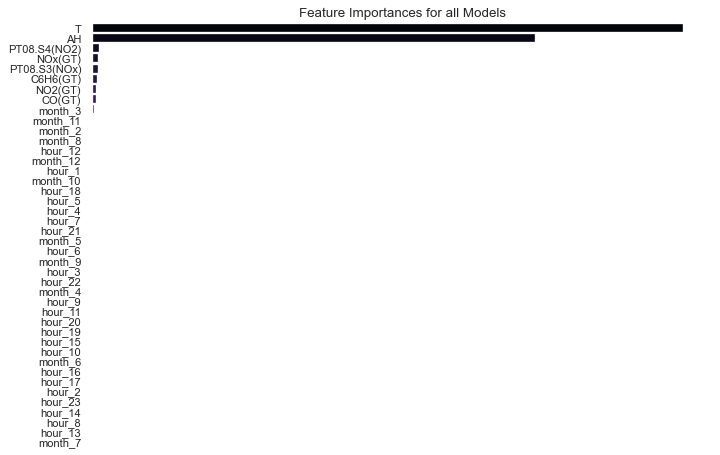

In [81]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),
                         columns=feat_imp_df.columns,
                         index=feat_imp_df.index)
scaled_fi['Overall'] = scaled_fi.sum(axis=1)

ordered_ranking = scaled_fi.sort_values('Overall', ascending=False)
fig, ax = plt.subplots(figsize=(10,7), dpi=80)
sns.barplot(data=ordered_ranking, y=ordered_ranking.index, x='Overall', palette='magma')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(False)
ax.set_title('Feature Importances for all Models');

In [1582]:
newdata.columns

Index(['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'T', 'AH', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'RH'],
      dtype='object')

In [1583]:
imp_features = newdata[['T', 'AH', 'month_10', 'PT08.S4(NO2)', 'PT08.S3(NOx)', 'NOx(GT)',
       'C6H6(GT)', 'NO2(GT)', 'CO(GT)', 'month_11']]

In [1584]:
imp_features.head()

T        AH  month_10  PT08.S4(NO2)  PT08.S3(NOx)   NOx(GT)  \
0  0.333333  0.280066         0      0.513040      0.310885  0.111036   
1  0.326882  0.264282         0      0.453237      0.360864  0.068382   
2  0.296774  0.276352         0      0.451439      0.346463  0.087339   
3  0.277419  0.294190         0      0.464478      0.326133  0.115098   
4  0.281720  0.295216         0      0.422212      0.373994  0.087339   

   C6H6(GT)   NO2(GT)    CO(GT)  month_11  
0  0.185535  0.335347  0.211864         0  
1  0.146226  0.271903  0.161017         0  
2  0.139937  0.338369  0.177966         0  
3  0.143082  0.362538  0.177966         0  
4  0.100629  0.344411  0.127119         0

In [1585]:
x = imp_features

In [1586]:
y = newdata['RH']

In [1587]:
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
#MLA_predict = list(range(0,10))

train_size = x.shape[0]
n_models = len(first_models)
oof_pred = np.zeros((train_size, n_models))
scores = []
row_index=0

for n, model in enumerate(first_models):
    model_pipeline = Pipeline(steps=[('Scaler', std_sca),
                                     ('Estimator', model)])
    MLA_name = model.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(model.get_params())
    
    cv_results = model_selection.cross_validate(model, x, y, cv  = skf, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    
    model_pipeline.fit(x,y)
    #MLA_predict[MLA_name] = model_pipeline.predict(x)
    row_index+=1
        

[16:29:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [1588]:
MLA_compare.sort_values(by='MLA Test Accuracy Mean',ascending=False)

MLA Name  \
2      RandomForestRegressor   
7              LGBMRegressor   
1      DecisionTreeRegressor   
5               XGBRegressor   
3  GradientBoostingRegressor   
6        KNeighborsRegressor   
8           LinearRegression   
4          AdaBoostRegressor   
0                        SVR   

                                      MLA Parameters MLA Train Accuracy Mean  \
2  {'bootstrap': True, 'criterion': 'mse', 'max_d...                0.999519   
7  {'boosting_type': 'gbdt', 'class_weight': None...                0.998679   
1  {'criterion': 'mse', 'max_depth': None, 'max_f...                       1   
5  {'base_score': 0.5, 'booster': 'gbtree', 'cols...                 0.99095   
3  {'alpha': 0.9, 'criterion': 'friedman_mse', 'i...                0.990998   
6  {'algorithm': 'auto', 'leaf_size': 30, 'metric...                0.968076   
8  {'copy_X': True, 'fit_intercept': True, 'n_job...                0.879926   
4  {'base_estimator': None, 'learning_rate': 1.0,...                0.870582   
0  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...                0.773194   

  MLA Test Accuracy Mean    MLA Time  
2                0.99797    0.316472  
7               0.997759    0.285684  
1               0.994857   0.0529674  
5               0.988906    0.342455  
3               0.988874    0.386427  
6               0.948727   0.0409738  
8               0.878276  0.00699615  
4               0.865433    0.608959  
0               0.771056     2.48114

In [85]:
!pip install mlxtend  

In [86]:
from mlxtend.regressor import StackingRegressor

In [1590]:
lgbm_cl = LGBMRegressor(random_state=seed)



In [1591]:
rf_cl = RandomForestRegressor(10, random_state=seed)

In [1592]:
gdb_cl = GradientBoostingRegressor(random_state=seed)

In [1593]:
lr = LinearRegression()

In [1594]:
sclf = StackingRegressor(regressors=[lgbm_cl, rf_cl,gdb_cl],
                          meta_regressor=lr)

label = ['LGBM', 'Random Forest','GDB' 'Stacking Regressor']
clf_list = [lgbm_cl, rf_cl,gdb_cl, lr]

In [1596]:
for clf, label in zip([lgbm_cl, rf_cl,gdb_cl,sclf], 
                      ['LGBM', 
                       'Random Forest', 
                       'GDB',
                       'StackingRegressor']):

    scores = model_selection.cross_val_score(clf, x, y, cv=3)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.98 (+/- 0.02) [LGBM]
Accuracy: 0.97 (+/- 0.02) [Random Forest]
Accuracy: 0.97 (+/- 0.01) [GDB]
Accuracy: 0.98 (+/- 0.02) [StackingRegressor]


In [ ]:
knn.fit(x_train,y_train)

model_fit(knn,"KNN")

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 32)

def model_fit(model,name):
    print("Name:",name)
    model.fit(x_train,y_train)
    score = model.score(x_train,y_train)
    print("Train Score:",score)
    test_score=model.score(x_test,y_test)
    print("Test Score:",test_score)
    y_predict = model.predict(x_test)
    null_mae=mean_absolute_error(y_test,y_null)
    print("Null_MAE:",null_mae)
    mae=mean_absolute_error(y_test,y_predict)
    print("TEST_MAE:",mae)
    null_rmse=np.sqrt(mean_squared_error(y_test,y_null))
    print("Null_rmse:",null_rmse)
    rmse=np.sqrt(mean_squared_error(y_test,y_predict))
    print("Test_Rmse:",rmse)
    



from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor()

model_fit(rand,"RandomForest")

from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()

xgb.fit(x_train,y_train)

model_fit(xgb,"Boosting")

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor()


from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

seed = 32
svc = SVR()
dtree = DecisionTreeRegressor(random_state=seed)
rand = RandomForestRegressor(10, random_state=seed)
gdb = GradientBoostingRegressor(random_state=seed)
adb = AdaBoostRegressor(random_state=seed)
xgb = XGBRegressor(random_state=seed)
knn = KNeighborsRegressor()
lgbm = LGBMRegressor(random_state=seed)

rand.fit(x_train,y_train)
random_train = rand.score(x_train,y_train)
random_test=rand.score(x_test,y_test)


xgb.fit(x_train,y_train)
boosting_train = xgb.score(x_train,y_train)
boosting_test = xgb.score(x_test,y_test)

knn.fit(x_train,y_train)
knn_train=knn.score(x_train,y_train)
knn_test = knn.score(x_test,y_test)

svc.fit(x_train,y_train)
svc_train=svc.score(x_train,y_train)
svc_test = svc.score(x_test,y_test)

dtree.fit(x_train,y_train)
dtree_train=dtree.score(x_train,y_train)
dtree_test = dtree.score(x_test,y_test)

gdb.fit(x_train,y_train)
gdb_train=gdb.score(x_train,y_train)
gdb_test = gdb.score(x_test,y_test)

adb.fit(x_train,y_train)
adb_train=adb.score(x_train,y_train)
adb_test = adb.score(x_test,y_test)

lgbm.fit(x_train,y_train)
lgbm_train=lgbm.score(x_train,y_train)
lgbm_test = lgbm.score(x_test,y_test)

metrix = {"Name":["Random Forest",'Boosting','KNN','SVM','DecisionTree','GradientBoosting','AdaBoostRegressor','LGBMRegressor'],"Train_Score":[random_train,boosting_train,knn_train,svc_train,dtree_train,gdb_train,adb_train,lgbm_train],
          "Test_score":[random_test,boosting_test,knn_test,svc_test,dtree_test,gdb_test,adb_test,lgbm_test]}

output = pd.DataFrame(metrix)

output

output['Name'][1]

first_models = [lda,svc, dtree, 
                 rf, gdb, adb, xgb, knn, lgbm]
first_model_names = ['LDA','SVM','Decision Tree', 
                     'Random Forest', 'GradientBoosting',
                    'AdaBoost', 'XGB', 'K-Neighbors','Light GBM'] 


first_model_names[0]

metricss = pd.DataFrame()
metricss

for i in :
    metricss['Name'][i] = first_model_names[i]
    















import eli5

# Import Eli5 package
from eli5.sklearn import PermutationImportance

# Find the importance of columns for prediction
xgboost_model = PermutationImportance(rand, random_state=32).fit(x_test,y_predict)
eli5.show_weights(xgboost_model, feature_names = x_test.columns.tolist())

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn.fit(x_train,y_train)

model_fit(knn,"KNN")